In [2]:
!pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)



{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

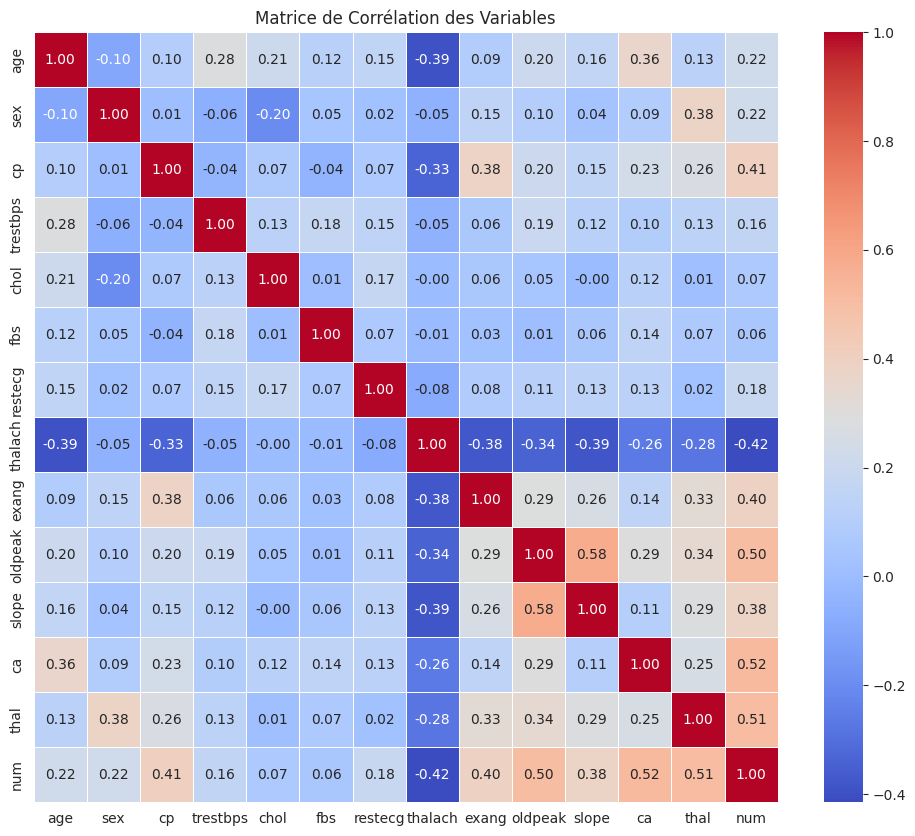

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine features (X) and target (y) into a single DataFrame
# Ensure 'ca' and 'thal' columns are numeric, coercing errors to NaN
# Then fill NaN values with the mean for correlation calculation
# Before combining, we need to handle potential non-numeric data types and missing values in X and y.
# Based on the previous 'variables' output, 'ca' and 'thal' have missing values.

# Convert 'ca' and 'thal' to numeric, coercing non-numeric values to NaN
X_numeric = X.copy()
X_numeric['ca'] = pd.to_numeric(X_numeric['ca'], errors='coerce')
X_numeric['thal'] = pd.to_numeric(X_numeric['thal'], errors='coerce')

# Fill NaN values with the mean of the column (a common approach for correlation)
# Alternatively, consider more sophisticated imputation methods if this is for modeling
X_numeric = X_numeric.fillna(X_numeric.mean(numeric_only=True))

# Combine the processed features and the target variable
df_combined = pd.concat([X_numeric, y], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_combined.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matrice de Corrélation des Variables')
plt.show()

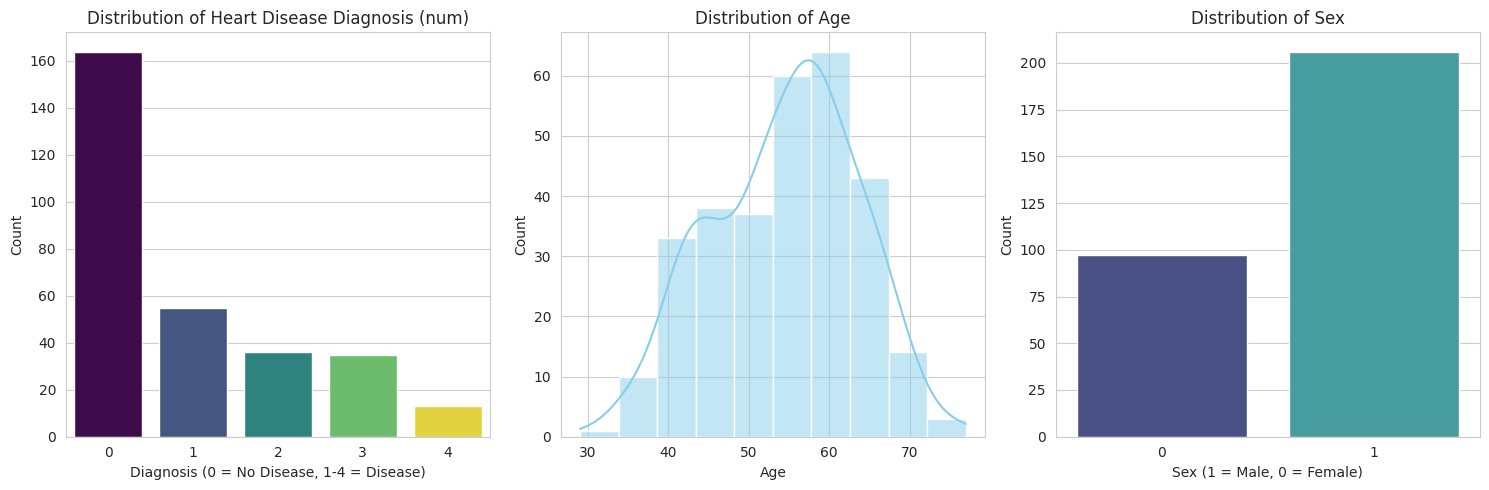

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with subplots
plt.figure(figsize=(15, 5))

# Plot 1: Distribution of the target variable 'num'
plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
sns.countplot(x=y['num'], hue=y['num'], palette='viridis', legend=False)
plt.title('Distribution of Heart Disease Diagnosis (num)')
plt.xlabel('Diagnosis (0 = No Disease, 1-4 = Disease)')
plt.ylabel('Count')

# Plot 2: Distribution of 'age'
plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
sns.histplot(X['age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Plot 3: Distribution of 'sex'
plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
sns.countplot(x=X['sex'], hue=X['sex'], palette='mako', legend=False)
plt.title('Distribution of Sex')
plt.xlabel('Sex (1 = Male, 0 = Female)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Nous pouvons également visualiser la relation entre le sexe et le diagnostic de maladie cardiaque.

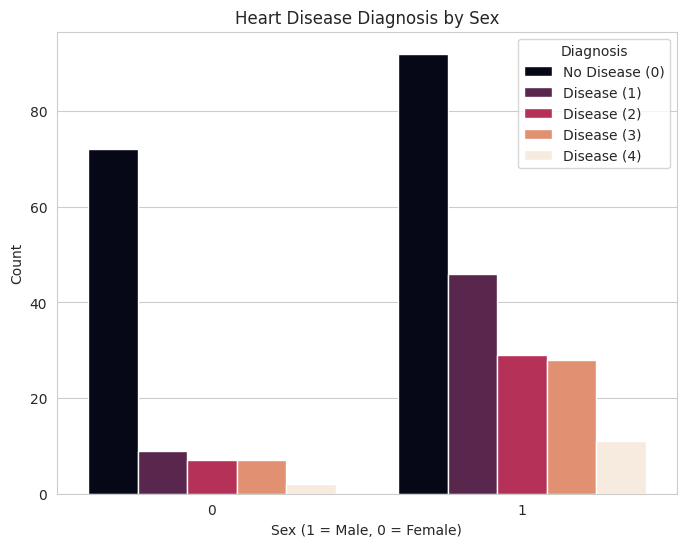

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x=X['sex'], hue=y['num'], palette='rocket')
plt.title('Heart Disease Diagnosis by Sex')
plt.xlabel('Sex (1 = Male, 0 = Female)')
plt.ylabel('Count')
plt.legend(title='Diagnosis', labels=['No Disease (0)', 'Disease (1)', 'Disease (2)', 'Disease (3)', 'Disease (4)'])
plt.show()

# Task
Prepare the Heart Disease dataset by handling missing values and encoding categorical variables, then train and evaluate a classification model to predict heart disease diagnosis.

## Préparation des données

### Subtask:
Nettoyer les données, gérer les valeurs manquantes de manière plus robuste, et encoder les variables catégorielles pour les rendre utilisables par un modèle d'apprentissage automatique.


**Reasoning**:
The first step in data preparation is to create a copy of the feature DataFrame to avoid modifying the original data. This aligns with the first instruction provided.



In [10]:
df_processed = X.copy()
print("Created a copy of X called df_processed.")
print(df_processed.head())

Created a copy of X called df_processed.
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  


**Reasoning**:
Following the instructions, I will first convert 'ca' and 'thal' to numeric, then impute their missing values using the mode, and finally apply one-hot encoding to all specified categorical columns in `df_processed`.



In [11]:
import numpy as np

# Convert 'ca' and 'thal' to numeric, coercing errors to NaN (Instruction 2)
df_processed['ca'] = pd.to_numeric(df_processed['ca'], errors='coerce')
df_processed['thal'] = pd.to_numeric(df_processed['thal'], errors='coerce')

# Identify categorical columns (Instruction 3)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Impute missing values for 'ca' and 'thal' using the mode (Instruction 4)
# Ensure to convert them back to integers after mode imputation if they represent categories
for col in ['ca', 'thal']:
    if df_processed[col].isnull().any():
        mode_val = df_processed[col].mode()[0]
        df_processed[col].fillna(mode_val, inplace=True)
        # Convert to integer type if the column should represent discrete categories
        df_processed[col] = df_processed[col].astype(int)

# Apply one-hot encoding to specified categorical columns (Instruction 5)
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True, dtype=int)

print("df_processed after converting 'ca' and 'thal' to numeric, imputing missing values, and one-hot encoding:")
print(df_processed.head())

df_processed after converting 'ca' and 'thal' to numeric, imputing missing values, and one-hot encoding:
   age  trestbps  chol  thalach  oldpeak  sex_1  cp_2  cp_3  cp_4  fbs_1  \
0   63       145   233      150      2.3      1     0     0     0      1   
1   67       160   286      108      1.5      1     0     0     1      0   
2   67       120   229      129      2.6      1     0     0     1      0   
3   37       130   250      187      3.5      1     0     1     0      0   
4   41       130   204      172      1.4      0     1     0     0      0   

   restecg_1  restecg_2  exang_1  slope_2  slope_3  ca_1  ca_2  ca_3  thal_6  \
0          0          1        0        0        1     0     0     0       1   
1          0          1        1        1        0     0     0     1       0   
2          0          1        1        1        0     0     1     0       0   
3          0          0        0        0        1     0     0     0       0   
4          0          1        0      

/tmp/ipython-input-684645955.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(mode_val, inplace=True)
/tmp/ipython-input-684645955.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

**Reasoning**:
The previous code generated a `FutureWarning` due to `inplace=True` in `fillna`. I will correct this by explicitly reassigning the result of `fillna` and then proceed with the final instruction to transform the target variable `y['num']` into a binary variable `y_binary`.



In [12]:
import numpy as np

# Convert 'ca' and 'thal' to numeric, coercing errors to NaN (Instruction 2)
df_processed['ca'] = pd.to_numeric(df_processed['ca'], errors='coerce')
df_processed['thal'] = pd.to_numeric(df_processed['thal'], errors='coerce')

# Identify categorical columns (Instruction 3)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Impute missing values for 'ca' and 'thal' using the mode (Instruction 4)
# Ensure to convert them back to integers after mode imputation if they represent categories
for col in ['ca', 'thal']:
    if df_processed[col].isnull().any():
        mode_val = df_processed[col].mode()[0]
        # Fix for FutureWarning: explicitly reassign the result of fillna
        df_processed[col] = df_processed[col].fillna(mode_val)
        # Convert to integer type if the column should represent discrete categories
        df_processed[col] = df_processed[col].astype(int)

# Apply one-hot encoding to specified categorical columns (Instruction 5)
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True, dtype=int)

# Transform the target variable 'y["num"]' into a binary variable (Instruction 6)
y_binary = (y['num'] > 0).astype(int)

print("df_processed after converting 'ca' and 'thal' to numeric, imputing missing values, and one-hot encoding:")
print(df_processed.head())
print("\ny_binary created:")
print(y_binary.head())

KeyError: 'ca'

**Reasoning**:
The previous attempt failed because the `df_processed` DataFrame was already one-hot encoded, removing the original 'ca' and 'thal' columns. To fix this, I will re-initialize `df_processed` from `X.copy()` at the beginning of the cell to ensure the original 'ca' and 'thal' columns are present before processing, and then apply all the instructions as before.



In [13]:
import numpy as np
import pandas as pd # Re-import pandas as it might be needed for the copy operation if kernel state is reset

# Re-initialize df_processed from X to ensure original columns are present
df_processed = X.copy()

# Convert 'ca' and 'thal' to numeric, coercing errors to NaN (Instruction 2)
df_processed['ca'] = pd.to_numeric(df_processed['ca'], errors='coerce')
df_processed['thal'] = pd.to_numeric(df_processed['thal'], errors='coerce')

# Identify categorical columns (Instruction 3)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Impute missing values for 'ca' and 'thal' using the mode (Instruction 4)
# Ensure to convert them back to integers after mode imputation if they represent categories
for col in ['ca', 'thal']:
    if df_processed[col].isnull().any():
        mode_val = df_processed[col].mode()[0]
        # Fix for FutureWarning: explicitly reassign the result of fillna
        df_processed[col] = df_processed[col].fillna(mode_val)
        # Convert to integer type if the column should represent discrete categories
        df_processed[col] = df_processed[col].astype(int)

# Apply one-hot encoding to specified categorical columns (Instruction 5)
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True, dtype=int)

# Transform the target variable 'y["num"]' into a binary variable (Instruction 6)
y_binary = (y['num'] > 0).astype(int)

print("df_processed after converting 'ca' and 'thal' to numeric, imputing missing values, and one-hot encoding:")
print(df_processed.head())
print("\ny_binary created:")
print(y_binary.head())

df_processed after converting 'ca' and 'thal' to numeric, imputing missing values, and one-hot encoding:
   age  trestbps  chol  thalach  oldpeak  sex_1  cp_2  cp_3  cp_4  fbs_1  \
0   63       145   233      150      2.3      1     0     0     0      1   
1   67       160   286      108      1.5      1     0     0     1      0   
2   67       120   229      129      2.6      1     0     0     1      0   
3   37       130   250      187      3.5      1     0     1     0      0   
4   41       130   204      172      1.4      0     1     0     0      0   

   restecg_1  restecg_2  exang_1  slope_2  slope_3  ca_1  ca_2  ca_3  thal_6  \
0          0          1        0        0        1     0     0     0       1   
1          0          1        1        1        0     0     0     1       0   
2          0          1        1        1        0     0     1     0       0   
3          0          0        0        0        1     0     0     0       0   
4          0          1        0      

## Division des données

### Subtask:
Diviser l'ensemble de données en ensembles d'entraînement et de test pour évaluer la performance du modèle sur des données non vues.


**Reasoning**:
To prepare the data for model training and evaluation, I need to split the preprocessed features and the binary target variable into training and testing sets, ensuring reproducibility with a specified random state.



In [14]:
from sklearn.model_selection import train_test_split

# Divide the preprocessed features (df_processed) and the binary target variable (y_binary)
# into training and testing sets. Use a test size of 20% (0.2) and set random_state to 42.
X_train, X_test, y_train, y_test = train_test_split(df_processed, y_binary, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (242, 20)
Shape of X_test: (61, 20)
Shape of y_train: (242,)
Shape of y_test: (61,)


## Entraînement du modèle de classification

### Subtask:
Sélectionner un modèle de classification approprié (par exemple, un RandomForestClassifier ou LogisticRegression) et l'entraîner sur l'ensemble d'entraînement.


**Reasoning**:
To begin training the classification model, I will import the `LogisticRegression` class, instantiate it with specified parameters for reproducibility and convergence, and then fit the model to the training data.



In [15]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression model
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model using the training datasets
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Reasoning**:
The previous code produced a `ConvergenceWarning` because the `LogisticRegression` model did not converge within 1000 iterations. To address this, I will increase the `max_iter` parameter to a higher value (e.g., 5000) to allow the model more time to converge during training.



In [16]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression model, increasing max_iter to ensure convergence
model = LogisticRegression(random_state=42, max_iter=5000)

# Train the model using the training datasets
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Évaluation du modèle

### Subtask:
Évaluer la performance du modèle entraîné sur l'ensemble de test en utilisant des métriques pertinentes telles que la précision, le rappel, le score F1 et la matrice de confusion.


**Reasoning**:
To evaluate the model, I will first make predictions on the test set using the trained model. Then, I will import the necessary metrics from `sklearn.metrics` to calculate and display the accuracy, precision, recall, F1-score, and the confusion matrix.



Accuracy: 0.8361
Precision: 0.8438
Recall: 0.8438
F1-Score: 0.8438


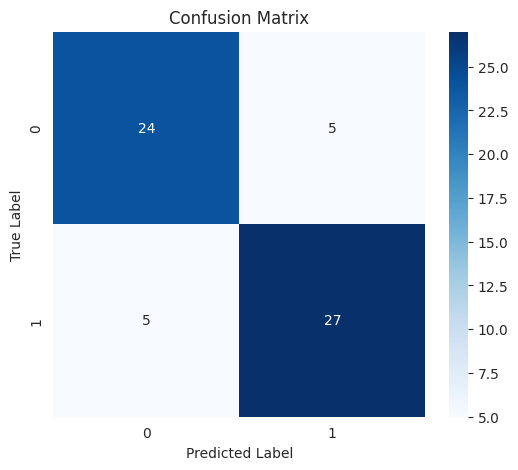

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Utiliser le modèle entraîné pour faire des prédictions sur l'ensemble de test X_test.
y_pred = model.predict(X_test)

# 3. Calculer et afficher la précision, le rappel, le score F1 et l'exactitude (accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# 4. Calculer et afficher la matrice de confusion.
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Final Task

### Subtask:
Présenter les résultats de l'entraînement et de l'évaluation du modèle, et discuter des prochaines étapes possibles.


## Summary:

### Q&A
The classification model achieved an accuracy of 0.8361, a precision of 0.8438, a recall of 0.8438, and an F1-score of 0.8438 in predicting heart disease diagnosis on the test set.

### Data Analysis Key Findings
*   **Data Preparation**:
    *   Missing values in the 'ca' and 'thal' columns were imputed using the mode of each respective column and then converted to integer type.
    *   Eight categorical columns ('sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal') were one-hot encoded, resulting in a processed feature set (`df_processed`) with 20 columns.
    *   The target variable 'num' was successfully transformed into a binary variable (`y_binary`), where 0 indicates no heart disease and values greater than 0 indicate heart disease.
*   **Data Splitting**: The dataset was divided into training and testing sets using an 80/20 split, resulting in 242 samples for training and 61 samples for testing.
*   **Model Training**: A Logistic Regression model was successfully trained on the preprocessed data, with the `max_iter` parameter increased to 5000 to ensure convergence during training.
*   **Model Evaluation**:
    *   The model demonstrated strong performance on the test set with an accuracy of 0.8361.
    *   The precision, recall, and F1-score were all 0.8438, indicating a balanced performance in identifying positive cases and a low rate of false positives and false negatives for heart disease prediction.

### Insights or Next Steps
*   Given the promising performance of the Logistic Regression model, explore more advanced classification algorithms (e.g., RandomForest, Gradient Boosting) to potentially achieve even higher predictive accuracy.
*   Conduct a feature importance analysis to identify which features are most influential in predicting heart disease, which could lead to a more interpretable model or suggest areas for further data collection.
